# NETWORK ANALYSIS IN THE ADJNOUN DATASET
- The dataset under analysis is a network of common adjective and noun adjacencies of the novel "David Copperfield" by Charles Dickens, as described by M. Newman. Nodes represent the most commonly occurring adjectives and nouns in the book. Edges connect any pair of words that occur in adjacent position in the text of the book.
- The research question of this analysis is "can you judge a book without reading it?". The objective of the research is to inspect the network and its components in order to extrapolate the main contents concerning the book without reading it.

# TASK 1: Plots Using Seaborn

- You should make at least two different types of plots that answer different questions. These
plots should be done using Seaborn and/or Plotly libraries and at least one of them allow for
some animation/interaction as you have seen in class

In [1]:
import networkx
import networkx as nx
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

dataset = nx.read_gml("adjnoun.gml")

In [2]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns
import pandas as pd
import networkx as nx
from networkx.algorithms import community
import networkx
from itertools import chain
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [3]:
G= dataset

# QUESTION 1: How is the degree distribution of the network?
- The degree of a node is the number of neighbours of the node
- The degree distribution is a frequency distribution of the degree sequence. It is important since most networks are highly right-skewed, meaning that a large majority of vertices have a low degree while a small number (hubs) have a high degree.


In [4]:
#extract the degree of each node in the network
degrees = [dataset.degree(n) for n in dataset.nodes()]
print(degrees)


[3, 14, 33, 9, 2, 7, 6, 11, 1, 17, 4, 7, 10, 6, 12, 12, 3, 49, 14, 9, 5, 10, 5, 8, 15, 14, 11, 15, 13, 5, 6, 12, 10, 5, 7, 6, 7, 10, 9, 5, 4, 8, 7, 28, 7, 6, 3, 5, 10, 5, 15, 28, 7, 6, 13, 3, 4, 3, 2, 13, 5, 2, 2, 5, 1, 6, 7, 4, 12, 2, 12, 6, 7, 7, 1, 10, 12, 3, 3, 13, 8, 6, 1, 5, 6, 2, 2, 10, 6, 7, 1, 1, 6, 2, 3, 1, 3, 1, 5, 2, 3, 2, 10, 9, 21, 7, 6, 2, 4, 1, 2, 1]


[Text(0.5, 1.0, 'Degree Distribution')]

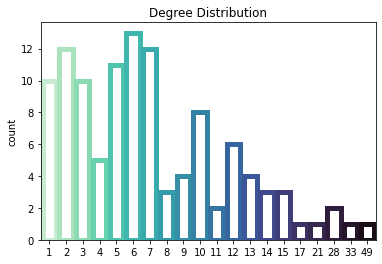

In [5]:
#plot the degree distribution with seaborn
#smaller degrees have lighter color, higher degrees darker color.
#In this case, many nodes have a low degree value, few nodes have a high degree value.
a=sns.countplot(x=degrees, 
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("mako_r", 20))
a.set(title= 'Degree Distribution')


Interactively:

In [6]:
def degree_hist(net, kind = None, group = False):
    if kind == 'in':  degrees = net.in_degree()
    elif kind == 'out':  degrees = net.out_degree()
    else: degrees = net.degree()
   
    df = pd.DataFrame(degrees, columns = ['Node', 'Degree'])
    nbins = None if group else len(degrees)
    fig = px.histogram(df, x="Degree", nbins = nbins)
    fig.update_layout(yaxis_title="Number of Nodes", bargap=0.01)
    return fig  

In [7]:
#A list of the frquency of each degree value
#It is indeed a right skewed graph: many nodes with small degrees, few with extremely high
#The degree distribution is highly asymmetric (or skewed)
degree_hist(dataset)

Is it scale-free?
- real-world networks are often claimed to be scale free, meaning that the fraction of nodes with degree k follows a power law k−α, a pattern with broad implications for the structure and dynamics of complex systems.
- a network is scale free if it follows a power-law distribution: few nodes with high degree and many nodes with low degree,
- from the graph above showing the degree distribution it can be deducted that the dataset is indeed scale free, since there are many nodes with a high degree, and a few nodes with a high degree

# QUESTION 2: Who has the highest number of neighbours in the network?
The nodes with the highest degree are the ones with highest number of neighbours, meaning that they are probably also the most central ones.
For instance in our case, we expect the nodes with the highest degree to be also the most used words in the the book they were extracted from. We are going to inspect both the degree, and the weighted degree and inspect whether there are similarities.

In [7]:
import networkx
#degree values stored into a dictionary
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

In [8]:
#transform thre result into a pandas dataframe
#sort from highest to lowest degree
degree_df = pd.DataFrame(dataset.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

node  degree
17   little      49
2       old      33
51     good      28
43    other      28
104    same      21
..      ...     ...
64    fancy       1
91    alone       1
90     lost       1
74     glad       1
111    year       1

[112 rows x 2 columns]

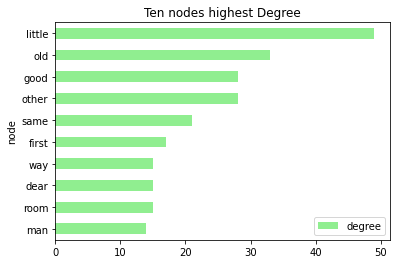

In [9]:
#plot the first ten nodes (out of 112) with the highest degree
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh', color='lightgreen', title='Ten nodes highest Degree').invert_yaxis()

Weighted Degree:
- The weighted degree of a node is based on the number of edges for a node, but ponderated by the weigtht of each edge. It's doing the sum of the weight of the edges

In [10]:
#weighted degrees stored into a dictionary
weighted_degrees = dict(networkx.degree(G, weight='Weight'))
networkx.set_node_attributes(G, name='weighted_degree', values=weighted_degrees)

In [11]:
#transform thre result into a pandas dataframe
#sort from highest to lowest wighted degree
weighted_degrees = dict(networkx.degree(G, weight='Weight'))
networkx.set_node_attributes(G, name='weighted_degree', values=weighted_degrees)
weighted_degree_df = pd.DataFrame(G.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df

node  weighted_degree
17   little               49
2       old               33
51     good               28
43    other               28
104    same               21
..      ...              ...
64    fancy                1
91    alone                1
90     lost                1
74     glad                1
111    year                1

[112 rows x 2 columns]

Nodes with the highest weighted degree value

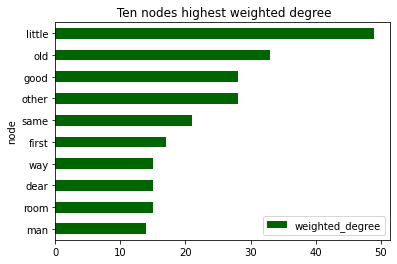

In [12]:
#plot the first ten nodes (out of 112) with the highest weighted degree
num_nodes_to_inspect = 10
weighted_degree_df[:num_nodes_to_inspect].plot(x='node', y='weighted_degree', color='darkgreen', kind='barh', title=' Ten nodes highest weighted degree').invert_yaxis()

What can be deduced from the degree?
- The words with the highest degree, and weighted degree are respectively "little and old". From these results, it can be deduced that the story narrated in the book focuses on two time periods of the main character's lifetime : his childhood, and elderly life.
- Moreover, from the ten words, it can be assumed that the main character is a man.

# TASK 2: NETWORK ANALYSIS
- Use the networkX package to describe
different structural properties of your network (is it connected? bipartite? scale-free? what is
the diameter? etc). You should compute at least two of different measures among the ones
seen in class, to determine the importance of the nodes. Be prepared to explain your choice and
comment your results

What does our network look like? Before starting the analysis we are going to plot a simple labeled representation of the network to get a first idea of what we are deliang with.

In [13]:
import networkx
import networkx as nx
import plotly.graph_objects as go
import networkx as nx



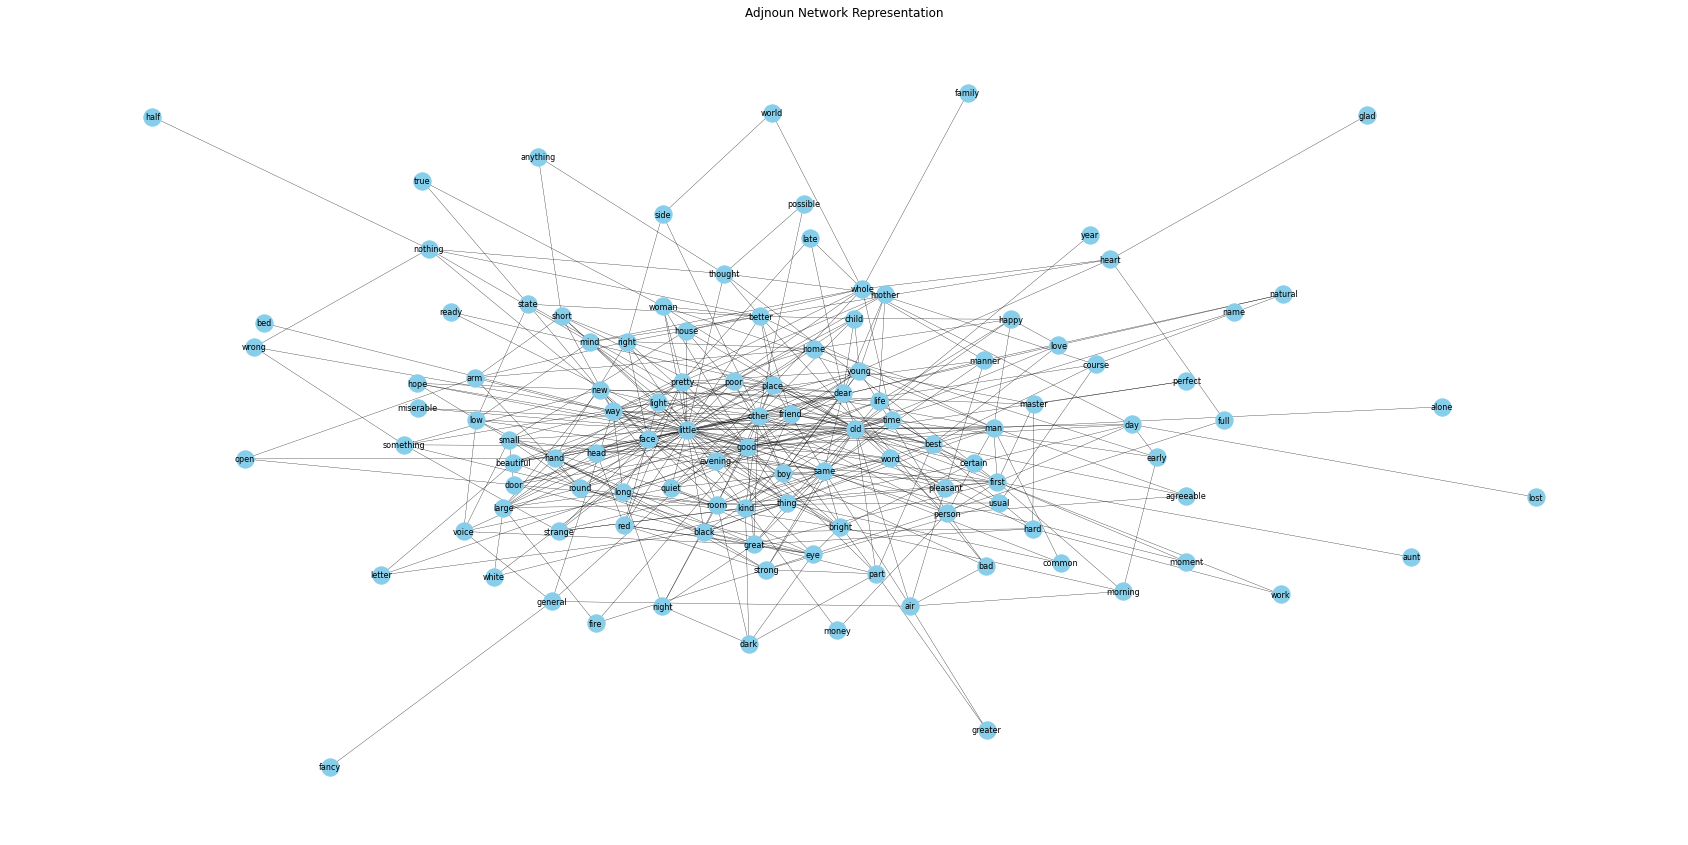

In [25]:
#simple plot of our network

plt.figure(figsize=(30,15))
ax = plt.gca()
ax.set_title('Adjnoun Network Representation')
networkx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)


# Nodes and Edges

In [26]:
#let's get an insight of the nodes present in our dataset
#the code returns an list of all  nodes present in the dataset with the respective labels
dataset.nodes

NodeView(('agreeable', 'man', 'old', 'person', 'anything', 'short', 'arm', 'round', 'aunt', 'first', 'bad', 'air', 'boy', 'beautiful', 'black', 'face', 'letter', 'little', 'young', 'best', 'course', 'friend', 'love', 'part', 'room', 'thing', 'time', 'way', 'better', 'heart', 'mind', 'place', 'right', 'state', 'woman', 'word', 'door', 'eye', 'bright', 'evening', 'morning', 'certain', 'day', 'other', 'child', 'happy', 'common', 'dark', 'kind', 'night', 'dear', 'good', 'home', 'mother', 'pretty', 'open', 'early', 'fire', 'full', 'great', 'master', 'moment', 'work', 'general', 'fancy', 'voice', 'head', 'hope', 'long', 'greater', 'hand', 'hard', 'red', 'life', 'glad', 'large', 'new', 'white', 'late', 'whole', 'light', 'manner', 'bed', 'house', 'low', 'money', 'ready', 'small', 'strange', 'thought', 'lost', 'alone', 'nothing', 'miserable', 'natural', 'half', 'wrong', 'name', 'pleasant', 'possible', 'side', 'perfect', 'poor', 'quiet', 'same', 'strong', 'something', 'true', 'usual', 'family', 

The dataset under analysis has 112 nodes, and 425 edges. The code below suggests that the graph is connected, meaning that it is possible to get from every vertex in the graph to every other vertex in the graph through a series of edges, called a path.
Moreover, if there are more edges than vertices in a connected graph then this suggests that there is a cycle in the graph.

In [27]:
print(nx.info(G))

Graph with 112 nodes and 425 edges


In [28]:
#Check connection
#The code returs True if the graph is connected
nx.is_connected(G)

True

In [29]:
#The graph has one connected component
nx.number_connected_components(G)

1

In [30]:
#Length of the shortest path is 2.53
nx.average_shortest_path_length(G)


2.5355534105534105

# Degrees
The degree (or valency) of a vertex of a graph is the number of edges that are incident to that vertex. 
In this case, the network under analysis has a maximum degree of 49.

In [31]:
#Edge degree
#this code gets the degree of each edge
degrees = [dataset.degree(n) for n in dataset.nodes()]
print(degrees)

[3, 14, 33, 9, 2, 7, 6, 11, 1, 17, 4, 7, 10, 6, 12, 12, 3, 49, 14, 9, 5, 10, 5, 8, 15, 14, 11, 15, 13, 5, 6, 12, 10, 5, 7, 6, 7, 10, 9, 5, 4, 8, 7, 28, 7, 6, 3, 5, 10, 5, 15, 28, 7, 6, 13, 3, 4, 3, 2, 13, 5, 2, 2, 5, 1, 6, 7, 4, 12, 2, 12, 6, 7, 7, 1, 10, 12, 3, 3, 13, 8, 6, 1, 5, 6, 2, 2, 10, 6, 7, 1, 1, 6, 2, 3, 1, 3, 1, 5, 2, 3, 2, 10, 9, 21, 7, 6, 2, 4, 1, 2, 1]


In [32]:
#Print the minimum and maximum degree
print(min(degrees))
print(max(degrees))

1
49


In [33]:
#Average degree of the network is 7.589
a= sum(dict(dataset.degree()).values()) / nx.number_of_nodes(dataset)
a

7.589285714285714

Is our dataset unipartite?
- A unipartite network consists of one set of nodes 


In [34]:
from networkx.algorithms import bipartite

In [35]:
#The function returns false if it is unipartite
bipartite.is_bipartite(G)


False

What is the diameter of the network?
- It is the shortest distance between the two most distant nodes in the network. In other words, once the shortest path length from every node to all other nodes is calculated, the diameter is the longest of all the calculated path lengths

In [36]:
print(nx.diameter(G))

5


In [37]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import networkx as nx

# MEASURES OF CENTRALITY: CLOSENESS CENTRALITY, BETWEENESS CENTRALITY, CLUSTERING COEFFICIENT, DEGREE RANK


Degree Centrality:
- The degree centrality assigns an importance score based on the number of links held by each node.
- It provides an insight on how many direct connections each node has to other nodes in the network.
- Objective: find nodes that are very connected, and are likely to hold most information, or that can quickly connect with the wider network.
- Degree centrality is the simplest measure of node connectivity. Sometimes it’s useful to look at in-degree (number of inbound links) and out-degree (number of outbound links) as distinct measures, for example when looking at transactional data or account activity.

In [38]:
# Degree Centrality
degree_centrality = networkx.degree_centrality(G)
networkx.set_node_attributes(G, name='degree', values= degree_centrality)
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

node    degree
17   little  0.441441
2       old  0.297297
51     good  0.252252
43    other  0.252252
104    same  0.189189
..      ...       ...
64    fancy  0.009009
91    alone  0.009009
90     lost  0.009009
74     glad  0.009009
111    year  0.009009

[112 rows x 2 columns]

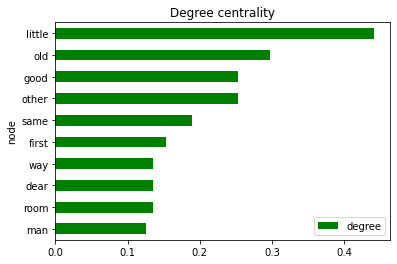

In [39]:
#Plot of degree centrality
num_nodes_to_inspect = 10 #choose how many nodes to examine
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', color='green', kind='barh', title='Degree centrality').invert_yaxis()

Closeness Centraility
- Definition: closeness centrality scores each node based on their ‘closeness’ to all other nodes in the network. Closeness centrality can help find good ‘broadcasters’, but in a highly-connected network nodes have a similar score. More central nodes can communicate more quickly and easily with others in the network, compared to less central nodes. More central nodes have low closeness centrality scores, and do not have to travel as far along paths to get to others in the network. Nodes with higher closeness centrality scores are less central and have to travel further along the paths to get to others in the network

- Function: this measure calculates the shortest paths between all nodes, then assigns each node a score based on its sum of shortest paths. 

- When to use it: for finding the individuals who are best placed to influence the entire network most quickly. 





In [40]:
# closeness Centrality
closeness_centrality = networkx.closeness_centrality(G)
networkx.set_node_attributes(G, name='closeness', values= closeness_centrality)
cl_df = pd.DataFrame(G.nodes(data='closeness'), columns=['node', 'closeness'])
cl_df = cl_df.sort_values(by='closeness', ascending=True) #this time we want to see the nodes with the highest cc; so we put True
cl_df

node  closeness
95     half   0.267470
74     glad   0.269417
64    fancy   0.276119
109  family   0.290576
90     lost   0.299191
..      ...        ...
104    same   0.488987
43    other   0.511521
51     good   0.526066
2       old   0.546798
17   little   0.616667

[112 rows x 2 columns]

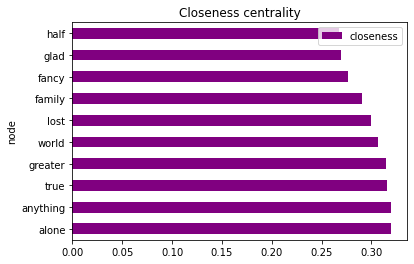

In [42]:
#plot of closeness centrality
num_nodes_to_inspect = 10 #choose how many nodes to examine
cl_df[:num_nodes_to_inspect].plot(x='node', y='closeness', color='purple', kind='barh', title='Closeness centrality').invert_yaxis()

Betweenness Centrality
- Definition: betweenness centrality measures the number of times a node lies on the shortest path between other nodes. Betweenness is useful for analyzing communication dynamics. Nodes with the highest betweeness centrality scores are often considered as "gatekeepers" of information and resources. Therefore, betwennes centrality is high for central nodes, because those are more likely to also be the shortest path between the nodes in the network. 

- Function: this measure shows which nodes are ‘bridges’ between nodes in a network. It does this by identifying all the shortest paths, and then counting how many times each node falls on one.

- Use: for finding the individuals who influence the flow around a system.



In [43]:
# Betweenness centrality
betweenness_centrality = networkx.betweenness_centrality(G)
networkx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df


node  betweenness
17   little     0.244685
2       old     0.128673
43    other     0.097456
51     good     0.094879
9     first     0.070844
..      ...          ...
74     glad     0.000000
64    fancy     0.000000
109  family     0.000000
8      aunt     0.000000
111    year     0.000000

[112 rows x 2 columns]

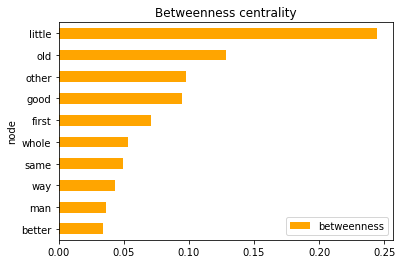

In [44]:
#plot of betweeness centrality
num_nodes_to_inspect = 10 #choose how many nodes to examine
betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='orange', kind='barh', title='Betweenness centrality').invert_yaxis()


Takeaways:
- The degree centrality underlines that the most central nodes are "little and old", these nodes are the most central nodes in the network, as they can provide more information about the book. As insight concerning the plot of the novel, these words suggest that the plot may focus on the two different phases of David Copperfield's life: his youth and his elderly life;
- Closeness centrality is high for nodes that are not central in the network. Indeed, the graph shows the ten furthest nodes from the center; meaning that the path that separates those nodes from the central ones is very long. It can be deducted that the nodes present in the graph are not relevant in order to get an insight of the book. Specifically, looking at the words that appear on the graph it can be deducted that the story is not about someone who travels the world, nor is focused on the loneliness of the main character.
- Betwennes centrality is high for central nodes, because those are more likely to also be the shortest path between the nodes in the network. It is evident tougt, that there is a big difference in score between the two first nodes and the others; suggesting that despite being central they do not lie in many shortest paths. In this case the central nodes are still "little" and "old", but the other words score low values suggesting that they are not frequent "connectors" between other words.

Clustering coefficient:
- It is a measure of the degree to which nodes in a graph tend to cluster together, 
- The local clustering coefficient C_{i} for a vertexv_{i} is then given by the proportion of links between the vertices within its neighborhood divided by the number of links that could possibly exist between them


In [45]:
# Clustering Coefficient of all nodes
cluster_coeff= nx.clustering(dataset)
networkx.set_node_attributes(G, name='clustering', values=betweenness_centrality)
cc_df = pd.DataFrame(G.nodes(data='clustering'), columns=['node', 'clustering'])
cc_df = cc_df.sort_values(by='clustering', ascending=False)
cc_df


node  clustering
17   little    0.244685
2       old    0.128673
43    other    0.097456
51     good    0.094879
9     first    0.070844
..      ...         ...
74     glad    0.000000
64    fancy    0.000000
109  family    0.000000
8      aunt    0.000000
111    year    0.000000

[112 rows x 2 columns]

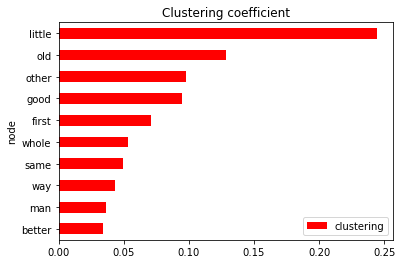

In [46]:
#plot of clustering coefficient
num_nodes_to_inspect = 10 #choose how many nodes to examine
cc_df[:num_nodes_to_inspect].plot(x='node', y='clustering', color='red', kind='barh', title='Clustering coefficient').invert_yaxis()

Degree Rank

- The rank of a given node, say i, measured in terms of degree of connectivity, is determined by the set of nodes that point to it.
- An important problem in networks is to determine the importance of a node relative to other elements of the network. There are different ways of defining importance, but one that has broad applicability is to rank nodes according to their degree of connectivity.
- In this network, the nodes with lower degrees tend to have the highest degree rank; whereas the nodes with higher degrees have a lower degree rank.


In [47]:
#Degree rank
def degree_rank(net):
    degree_sequence = sorted((d for n, d in net.degree()), reverse=True)
    df = pd.DataFrame(degree_sequence, columns = ['Degree'])
    fig = px.scatter(df, y = 'Degree')
    fig.update_layout(xaxis_title="Rank")
    return fig

In [48]:
degree_rank(dataset)

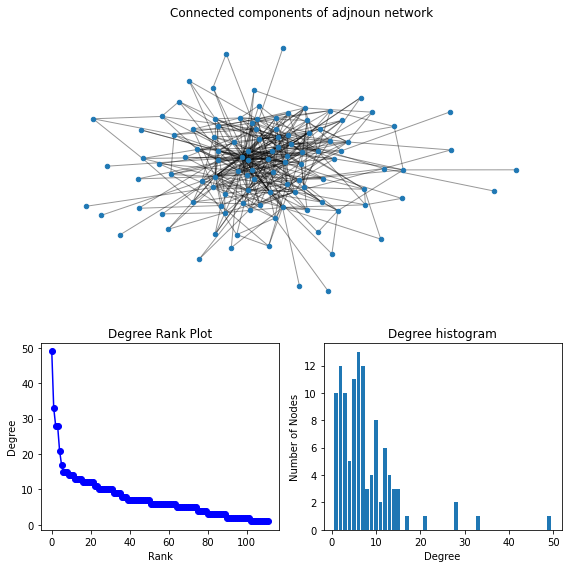

In [49]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = dataset

#G = nx.gnp_random_graph(100, 0.02, seed=10374196)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of adjnoun network")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Number of Nodes")

fig.tight_layout()
plt.show()

Density
The density of a network is defined as a normalized ratio between 0 and 1 of the number of edges to the number of possible edges in a network with nodes.
Here it is 0.06 suggesting that the graph is sparse. A sparse graph has much fewer links than the possible maximum number of links within that network .

In [50]:
# The density tells is how many of the possible edges in the graph are actually present:

nx.density(dataset)

0.06837194337194337

Largest connected components


In [51]:
# Find the largest connected components
# Connected components are sorted in descending order of their size
largest_cc_nodeset = max(nx.connected_components(dataset), key=len)
largest_cc = dataset.subgraph(largest_cc_nodeset).copy()
print(largest_cc.nodes())

['agreeable', 'man', 'old', 'person', 'anything', 'short', 'arm', 'round', 'aunt', 'first', 'bad', 'air', 'boy', 'beautiful', 'black', 'face', 'letter', 'little', 'young', 'best', 'course', 'friend', 'love', 'part', 'room', 'thing', 'time', 'way', 'better', 'heart', 'mind', 'place', 'right', 'state', 'woman', 'word', 'door', 'eye', 'bright', 'evening', 'morning', 'certain', 'day', 'other', 'child', 'happy', 'common', 'dark', 'kind', 'night', 'dear', 'good', 'home', 'mother', 'pretty', 'open', 'early', 'fire', 'full', 'great', 'master', 'moment', 'work', 'general', 'fancy', 'voice', 'head', 'hope', 'long', 'greater', 'hand', 'hard', 'red', 'life', 'glad', 'large', 'new', 'white', 'late', 'whole', 'light', 'manner', 'bed', 'house', 'low', 'money', 'ready', 'small', 'strange', 'thought', 'lost', 'alone', 'nothing', 'miserable', 'natural', 'half', 'wrong', 'name', 'pleasant', 'possible', 'side', 'perfect', 'poor', 'quiet', 'same', 'strong', 'something', 'true', 'usual', 'family', 'world', 

# Communities
When analyzing different networks, it may be important to discover communities inside them. 

In [52]:
import plotly.graph_objects as go
from networkx.algorithms import community
import networkx as nx

G = dataset

In [53]:
edge_style_def = dict(color = 'gray', width = 0.5)  # define the default style for edges
node_style_def = dict(symbol = 'circle', size = 5, opacity = 0.9, 
                      color = 'blue', line = dict(color = 'rgb(0,0,0)', width = 0.5))   # define the default style for nodes

In [54]:
def set_layout(G, ndim = 2, kamada = True):    
    print('Calculating coordinates')
    layout = nx.kamada_kawai_layout(G, dim = ndim) if kamada else nx.spring_layout(G, dim = ndim) # define the node layout with NetworkX
    print('End')
    edgelist = list(G.edges())
    
    # Extract coordinates
    ax_nodes = pd.DataFrame(layout).transpose() 
    ax_nodes.columns = ['X', 'Y'] if ndim == 2 else ['X', 'Y', 'Z'] # 2D or 3D?
    
    
    # define layout for edges
    if ndim == 2:
        layout_e = dict(map(lambda e: 
                (e, # edge key
                ([layout[e[0]][0], layout[e[1]][0], None],  # X
                [layout[e[0]][1], layout[e[1]][1], None])  # Y
                ), edgelist))
    else:
        layout_e = dict(map(lambda e: 
            (e, # edge key
            ([layout[e[0]][0], layout[e[1]][0], None], # X
            [layout[e[0]][1], layout[e[1]][1], None],  # Y
            [layout[e[0]][2], layout[e[1]][2], None])  # Z
            ), edgelist))
    
    
    # extract coordinates
    ax_edges = pd.DataFrame(layout_e).transpose()
    ax_edges.columns = ['X', 'Y'] if ndim == 2 else ['X', 'Y', 'Z']

    return ax_nodes, ax_edges

In [56]:
def set_trace(X, Y, kind, style, name, Z = None, text = None): #draw nodes or edges
    mode = 'markers' if kind == 'node' else 'lines'
    hoverinfo = 'text' if kind == 'node' else 'none'
    if Z is None:
        if kind == 'node':
            return go.Scatter(x = X, y = Y, mode = mode, name = name, marker = style, text = text, hoverinfo = hoverinfo)  # draw nodes (i.e., markers) in 2D
        else:
            return go.Scatter(x = X, y = Y, mode = mode, name = name, line = style, text = text, hoverinfo = hoverinfo)  # draw edges (i.e., lines) in 2D
    else: 
        if kind == 'node':
            return go.Scatter3d(x = X, y = Y, z = Z, mode = mode, marker = style,  text = text, name = name, hoverinfo = hoverinfo)  # draw nodes (i.e., markers) in 3D
        else:
            return go.Scatter3d(x = X, y = Y, z = Z, mode = mode, line = style,  text = text, name = name, hoverinfo = hoverinfo)  # draw edges (i.e., lines) in 3D

    
def set_traces(nodes_ax: pd.DataFrame, edges_ax: pd.DataFrame, communities = None):  # Function to set up the main figure with nodes, edges, and communities
    traces = []
    Xe = list(chain(*edges_ax.X.tolist())) 
    Ye = list(chain(*edges_ax.Y.tolist()))
    Ze = list(chain(*edges_ax.Z.tolist())) if 'Z' in edges_ax.columns else None

    traces.append(set_trace(Xe, Ye, Z = Ze, kind = 'edge', style = edge_style_def, name = 'Link'))
    
    if communities is None:
        traces.append(set_trace(nodes_ax.X.tolist(), nodes_ax.Y.tolist(), 
                                Z = nodes_ax.Z.tolist() if 'Z' in nodes_ax.columns else None, 
                                kind = 'node', style = node_style_def, 
                                name = 'Character', text = nodes_ax.index))
    else:
        colors = list(sns.color_palette(n_colors =len(communities)).as_hex())
        for idcom, community in enumerate(communities):
            node_style = node_style_def.copy()
            node_style['color'] = colors[idcom]
            temp = nodes_ax[nodes_ax.index.isin(community)]
            traces.append(set_trace(temp.X.tolist(), temp.Y.tolist(), 
                                Z = temp.Z.tolist() if 'Z' in temp.columns else None, 
                                kind = 'node', style = node_style, 
                                name = 'Class '+str(idcom), text = temp.index))
            
                                       
    return traces

In [57]:
def draw_plotly_network(net, ndim = 2, communities = None, kamada = True):  # Main function to draw a network
    nodes_ax, edges_ax = set_layout(net, ndim = ndim, kamada = kamada)  # the kamada parameter sets the Networkx layout to use. The ndim parameter sets the dimensions the layout (i.e., 2D or 3D)
    traces = set_traces(nodes_ax, edges_ax, communities)  # the kamada parameter set the Networkx layout to use.
    pyo.iplot(traces, filename = 'basic-line')  # Plot the the network

In [58]:
draw_plotly_network(dataset, ndim = 3)

Calculating coordinates
End


In [59]:
#6 communities
comm_mod = community.greedy_modularity_communities(dataset)  # Detect communities using a Modularity Optimization algorithm
draw_plotly_network(dataset, communities = comm_mod)

Calculating coordinates
End


In [60]:
draw_plotly_network(dataset, ndim = 3, communities = comm_mod)

Calculating coordinates
End


# COMMUNITIES
- Modularity as Community Measure

In [61]:
communities = community.greedy_modularity_communities(G)

In [62]:
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

In [63]:
networkx.set_node_attributes(G, modularity_class, 'modularity_class')

In [64]:
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)

In [65]:
communities_df

node  modularity_class
29   heart                 6
74    glad                 6
58    full                 6
96   wrong                 5
71    hard                 5
..     ...               ...
55    open                 0
54  pretty                 0
51    good                 0
87   small                 0
70    hand                 0

[112 rows x 2 columns]

Inspect each community in the dataframe

In [66]:
communities_df[communities_df['modularity_class'] == 1]

node  modularity_class
73        life                 1
85       money                 1
97        name                 1
77       white                 1
91       alone                 1
90        lost                 1
0    agreeable                 1
56       early                 1
40     morning                 1
46      common                 1
2          old                 1
3       person                 1
8         aunt                 1
9        first                 1
19        best                 1
22        love                 1
25       thing                 1
26        time                 1
41     certain                 1
42         day                 1
45       happy                 1
111       year                 1
61      moment                 1
1          man                 1

In [67]:
communities_df[communities_df['modularity_class'] == 2]

node  modularity_class
82         bed                 2
65       voice                 2
52        home                 2
84         low                 2
35        word                 2
31       place                 2
17      little                 2
107       true                 2
39     evening                 2
38      bright                 2
93   miserable                 2
34       woman                 2
33       state                 2
32       right                 2
86       ready                 2
30        mind                 2
104       same                 2
28      better                 2
103      quiet                 2

In [68]:
communities_df[communities_df['modularity_class'] == 3]

node  modularity_class
81     manner                 3
110     world                 3
109    family                 3
4    anything                 3
43      other                 3
5       short                 3
83      house                 3
98   pleasant                 3
63    general                 3
80      light                 3
79      whole                 3
100      side                 3
64      fancy                 3
27        way                 3
94    natural                 3
20     course                 3

In [69]:
#coomunity four
communities_df[communities_df['modularity_class'] == 4]

node  modularity_class
21     friend                 4
53     mother                 4
78       late                 4
89    thought                 4
44      child                 4
50       dear                 4
48       kind                 4
69    greater                 4
11        air                 4
99   possible                 4
18      young                 4
102      poor                 4
12        boy                 4
10        bad                 4

In [70]:
#community 3 etcc
communities_df[communities_df['modularity_class'] == 5]

node  modularity_class
96       wrong                 5
71        hard                 5
95        half                 5
62        work                 5
60      master                 5
15        face                 5
101    perfect                 5
92     nothing                 5
76         new                 5
106  something                 5
88     strange                 5

In [71]:
communities_df[communities_df['modularity_class'] == 6]

node  modularity_class
29  heart                 6
74   glad                 6
58   full                 6

Plot of communities Present in the network

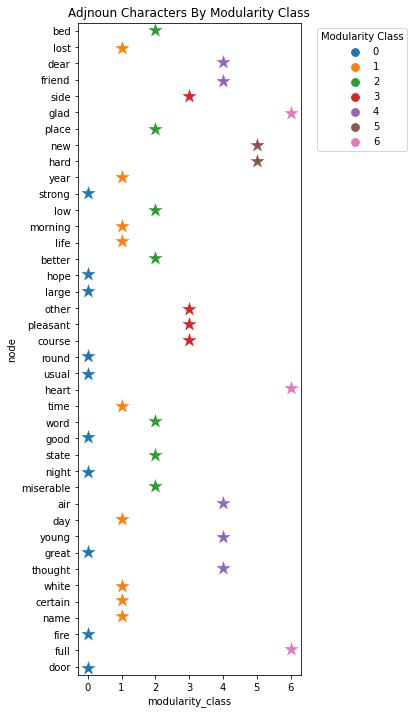

In [72]:
import seaborn as sns
#Set figure size
plt.figure(figsize=(4,12))

#Plot a categorical scatter plot from the dataframe communities_df.sample(40)
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(40),
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Adjnoun Characters By Modularity Class")
plt.show()

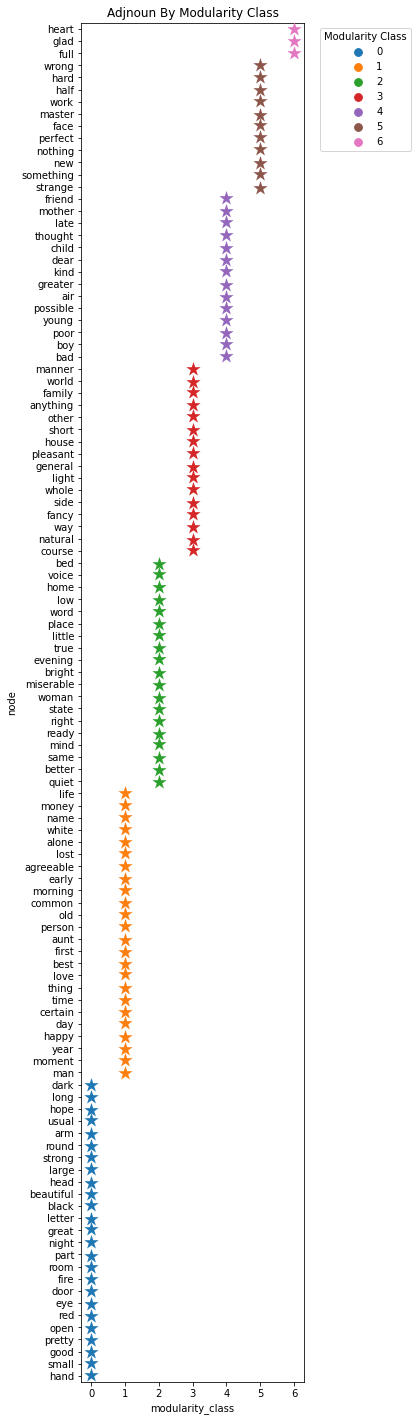

In [73]:
#this takes a while to run but it works and is nice to see
plt.figure(figsize=(4,25))
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Adjnoun By Modularity Class")
plt.show()

Communities with Girvan Newman algorithm
- Girvan-Newman Algorithm for Community Detection
Under the Girvan-Newman algorithm, the communities in a graph are discovered by iteratively removing the edges of the graph, based on the edge betweenness centrality value.The edge with the highest edge betweenness is removed first. 

In [74]:
import itertools 

In [75]:
comp= networkx.algorithms.community.girvan_newman(dataset)
k=6
limited= itertools.takewhile(lambda c:len(c) <=k, comp)
communities= list(limited)[-1]

In [76]:
community_dict = {}
community_num = 0
for community in communities:
    for character in community:
        community_dict[character] = community_num
        community_num += 1
        nx.set_node_attributes(G, community_dict, 'community')


In [77]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality

In [78]:
nx.set_node_attributes(G, betweenness_dict, 'betweenness')


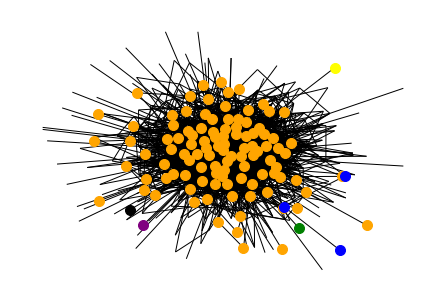

In [79]:
import matplotlib.pyplot as plt
color = 0
color_map = ['orange', 'blue', 'yellow', 'purple', 'black', 'green']
for community in communities:
    nx.draw(G, pos = nx.spring_layout(G, iterations=200), nodelist = community, node_size = 100, node_color = color_map[color])
    color += 1


From the graph it is evident that this algorithm does not yield satisfying results. So we'll proceed using another metrix for communities= "modularity".

# Communities with Modulairty

Firts Network with Nodes Sized and Colored By Attribute (Degree)

In [80]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap

In [81]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

In [83]:
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in networkx.degree(G)])
networkx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)
#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Blues8

#Choose a title!
title = 'Adjnoun Network'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Character", "@index"),
        ("Degree", "@degree")
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html\
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as spectrum of color palette)
minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")

Next, size and color nodes by modularity class.

In [84]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap
from networkx.algorithms import community
import networkx

In [85]:
communities = community.greedy_modularity_communities(G)

In [86]:
# Create empty dictionaries
modularity_class = {}
modularity_color = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number and a distinct color
    for name in community: 
        modularity_class[name] = community_number
        modularity_color[name] = Spectral8[community_number]

In [87]:
# Add modularity class and color as attributes from the network above
networkx.set_node_attributes(G, modularity_class, 'modularity_class')
networkx.set_node_attributes(G, modularity_color, 'modularity_color')

In [88]:
#Choose attributes from G network to size and color by  setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'modularity_color'
#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Blues8
#Choose a title!
title = 'Adjnoun Communtiies by Modularity'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Character", "@index"),
        ("Degree", "@degree"),
         ("Modularity Class", "@modularity_class"),
        ("Modularity Color", "$color[swatch]:modularity_color"),
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset, tap", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as category from attribute)
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=color_by_this_attribute)

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")

Lastly, add the labels to the community.

In [89]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap
from networkx.algorithms import community
import networkx

In [90]:
#Calculate degree for each node and add as node attribute
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

In [91]:
#Slightly adjust degree so that the nodes with very small degrees are still visible
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in networkx.degree(G)])
networkx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

In [92]:
#Calculate communities
communities = community.greedy_modularity_communities(G)

In [93]:
# Create empty dictionaries
modularity_class = {}
modularity_color = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number and a distinct color
    for name in community: 
        modularity_class[name] = community_number
        modularity_color[name] = Spectral8[community_number]
#Choose colors for node and edge highlighting
node_highlight_color = 'white'
edge_highlight_color = 'black'

#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'modularity_color'

#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Blues8

#Choose a title!
title = 'Adjnoun Communities Labels'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Character", "@index"),
        ("Degree", "@degree"),
         ("Modularity Class", "@modularity_class"),
        ("Modularity Color", "$color[swatch]:modularity_color"),
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, networkx.spring_layout, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as category from attribute)
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=color_by_this_attribute)
#Set node highlight colors
network_graph.node_renderer.hover_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)
network_graph.node_renderer.selection_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.3, line_width=1)
#Set edge highlight colors
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

#Highlight nodes and edges
network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)

#Add Labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7)
plot.renderers.append(labels)

show(plot)
#save(plot, filename=f"{title}.html")

# Take-aways from communities:
- The communities shown above give us interesting insights about the network under analysis,
- Gephi was also used for this purpose and will be attached as a separate file, 
- Gephi and Bokeh library turned out to give the best results in terms of visualization and accuracy.

The communities were employed in order to get an insight of whether or not they are useful in the task of reproducing the plot of the novel.
It emerged that (from Gephi):
- the blue communitiy represents the chilhood stage of David's Copperfield life, since the most recurring adjn/nouns are: boy, dear, happy, love, young, pretty, poor, friend, child, mother. Moreover, two characters might be extrapolated from this community: the figure of his mother, and one of his friends who appears to be a child in a condtion of poverty; 

- the purple community represents the teenage years of David Copperfield, since the following words little, hand, face, small, round, hope, eyes appear the most. This was assumed since the semantic field of those words leads back to that specific period; 

- the green community is the young adulthood life-period, since the most recurring words are: kind, great, perfect, first, new, large, best, beautiful, thing, life, aunt. Addionally, here two new characters appear: the aunt, who is thought to be a marginal character since the node is far from the center of the network. Moreover, from this community, information regarding a fateful wife/lover can be extrapolated. The latter assumption is based on words as: beautiful, first, perfect, thing. 

- the orange community is believed to be the main character's elderly life period, since the most frequent words are: miserable, old, same, quite, room, year, usual, agreeable, strong, money. This semantic field takes us to a period of money stability, in which the character is old and everything is quite or the "same",

- the fuchsia community could be David Copperfield's perspective on things during the storytelling since words as other, light, way, short, place, evening, fancy, general short, manner,pleasant, general, fancy , possible , amything, appear the most,

- the brown community is believed to portray family affairs since the most recurring words are better, nothing, mind, hearth, glad, side, family, woman, true, full, half, wrong, state, whole.


# CONCLUSION


Now in order to get a counterproof of whether our research was effective or not, we have compared our results with the real story behind the book.

What is the plot of the novel?
- The plot: the novel traces the life of David Copperfield from the time of his birth to his mature manhood, when he is married and familiar with the vicissitudes of life. 

Who are the characters in the plot?
- David’s mother. The kind, generous, and goodhearted Clara embodies maternal caring until her death, which occurs early in the novel,
- David's childhood friend named Tommy Traddles. He is described as a young simple, goodhearted person who faces money troubles. This was the boy identified in the blue community above. 
- David's first wife and first love is Dora Spenlow. This part also covertly emerges from the analysis of the green community,
- David's aunt, Miss Betsey Trotwood takes care of him during his childhood after his mom passes. This fact could explain the marginal position of the node in the network, since she only appears in the section of the book dedicated to the chilhood narration.

In conclusion, we can affirm that the netwrok analysis effectively succeedes into finding the main plot of the novel and some features of it.
